<a href="https://colab.research.google.com/github/y-ali0/Solar-System-Simulation/blob/main/Session6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The frame is: 0
The frame is: 0
The frame is: 1
The frame is: 2
The frame is: 3
The frame is: 4
The frame is: 5
The frame is: 6
The frame is: 7
The frame is: 8
The frame is: 9
The frame is: 10
The frame is: 11
The frame is: 12
The frame is: 13
The frame is: 14
The frame is: 15
The frame is: 16
The frame is: 17
The frame is: 18
The frame is: 19
The frame is: 20
The frame is: 21
The frame is: 22
The frame is: 23
The frame is: 24
The frame is: 25
The frame is: 26
The frame is: 27
The frame is: 28
The frame is: 29
The frame is: 30
The frame is: 31
The frame is: 32
The frame is: 33
The frame is: 34
The frame is: 35
The frame is: 36
The frame is: 37
The frame is: 38
The frame is: 39
The frame is: 40
The frame is: 41
The frame is: 42
The frame is: 43
The frame is: 44
The frame is: 45
The frame is: 46
The frame is: 47
The frame is: 48
The frame is: 49
The frame is: 50
The frame is: 51
The frame is: 52
The frame is: 53
The frame is: 54
The frame is: 55
The frame is: 56
The frame is: 57
The fram

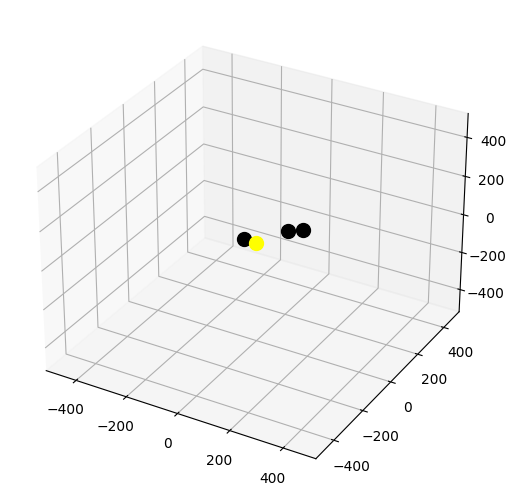

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

class SolarSystem():
    """This class creates the SolarSystem object."""
    def __init__(self):
        """With self you can access private atributes of the object."""
        self.size = 1000
        self.planets = []
        # This initializes the 3D figure
        self.fig = plt.figure()
        self.ax = Axes3D(self.fig, auto_add_to_figure=False)
        self.fig.add_axes(self.ax)
        self.dT = 1

    def add_planet(self, planet):
        """Every time a planet is created it gets put into the array."""
        self.planets.append(planet)

    def update_planets(self):
        """This method moves and draws all of the planets."""
        self.ax.clear()
        for planet in self.planets:
            planet.move()
            planet.draw()

    def fix_axes(self):
        """The axes would change with each iteration otherwise."""
        self.ax.set_xlim((-self.size/2, self.size/2))
        self.ax.set_ylim((-self.size/2, self.size/2))
        self.ax.set_zlim((-self.size/2, self.size/2))

    def gravity_planets(self):
        """This method calculated gravity interaction for every planet."""
        for i, first in enumerate(self.planets):
            for second in self.planets[i+1:]:
                first.gravity(second)

class Planet():
    """This class creates the Planet object."""
    def __init__(self, SolarSys, mass, position =(0,0,0),velocity=(0,0,0)):
         self.SolarSys = SolarSys
         self.mass = mass
         self.position = position
         self.velocity = velocity
         # The planet is automatically added to the SolarSys.
         self.SolarSys.add_planet(self)
         self.color = "black"

    def move(self):
        """The planet is moved based on the velocity."""
        self.position = ( self.position[0] + self.velocity[0]*SolarSys.dT, self.position[1] + self.velocity[1]*SolarSys.dT, self.position[2]+self.velocity[2]*SolarSys.dT)

    def draw(self):
        """The method to draw the planet."""
        self.SolarSys.ax.plot(*self.position, marker="o", markersize = 10, color=self.color)

    def gravity(self, other):
        """The method to compute gravitational force for two planets. numpy module is used to handle vectors."""
        distance = np.subtract(other.position, self.position)
        distanceMag = np.linalg.norm(distance)
        distanceUnit = np.divide(distance, distanceMag)
        forceMag = self.mass*other.mass / (distanceMag**2)
        force = np.multiply(distanceUnit, forceMag)
        # Switch makes force on self opposite to other
        switch = 1
        for body in self, other:
            acceleration = np.divide(force, body.mass)
            acceleration = np.multiply(force, SolarSys.dT*switch)
            body.velocity = np.add(body.velocity, acceleration)
            switch *= -1

class Sun(Planet):
    """This class is inherited from planet. Everything is the same as in planet, except the position of the Sun is fixed and it is yellow."""
    def __init__(self,SolarSys, mass=1000, position=(0,0,0), velocity = (0,0,0)):
        super(Sun, self).__init__(SolarSys,mass,position,velocity)
        self.color = "yellow"

    def move(self):
        self.position = self.position

# Instantiating of the solar system.
SolarSys = SolarSystem()

# Instantiating of planets

planet1 = Planet(SolarSys, mass=10, position=(150,50,0), velocity=(0,5,5))
planet2 = Planet(SolarSys, mass=10, position=(100,-50,150), velocity=(5,0,0))
planet3 = Planet(SolarSys, mass=10, position=(-100,-50,150),velocity=(-4,0,0))

# Instantiating of the sun
sun = Sun(SolarSys)

def animate(i):
    """This controls the animation."""
    print("The frame is:", i)
    SolarSys.gravity_planets()
    SolarSys.update_planets()
    SolarSys.fix_axes()

# This calls the animate function and creates animation.
anim = animation.FuncAnimation(SolarSys.fig, animate, frames=100, interval=100)
# This prepares the writer for the animation
writervideo = animation.FFMpegWriter(fps=60)
# This saves the animation.
anim.save("planets_animation.mp4", writer=writervideo, dpi=200)

